In [1]:
import pandas as pd


plain = pd.read_csv("results/plain.csv")
# native = pd.read_csv("results/opt3.csv")
# invsum = pd.read_csv("results/invsum.csv")
# ur2 = pd.read_csv("results/unroll2.csv")
ur4 = pd.read_csv("results/unroll4.csv")
fm = pd.read_csv("results/fastmath.csv")
avx = pd.read_csv("results/avx.csv")
avx_max = pd.read_csv("results/avx_max.csv")

df = plain
df.rename(columns={"time": "plain"}, inplace=True)
df["plain"] = df["plain"] * 1e6
# df["native"] = native["time"] * 1e6
# df["no-deps"] = invsum["time"] * 1e6
# df["unroll2"] = ur2["time"] * 1e6
df["generic-opts"] = ur4["time"] * 1e6
df["fast-math"] = fm["time"] * 1e6
df["avx"] = avx["time"] * 1e6
df["avx_max"] = avx_max["time"] * 1e6
df

,elements,plain,generic-opts,fast-math,avx,avx_max
0,128,7.70588,6.19252,6.44678,1.28248,0.85882
1,256,9.29790,7.56728,6.39900,1.95418,1.23028
2,512,11.37470,9.92114,7.63282,4.08238,2.13908
3,1024,18.53570,16.71890,10.34640,6.31536,3.94440
4,2048,32.12390,25.61980,16.61910,11.44910,7.85906
5,4096,57.62260,46.44780,23.15510,22.72510,14.32010
6,8192,110.81300,89.14720,37.24960,43.34240,28.09520
7,16384,223.14200,173.79500,70.26050,83.85570,58.05970


In [2]:
# df["native_su"] = df["plain"] / df["native"]
# print(df.to_latex(header=True, index=False, float_format="%.4f"))
# df

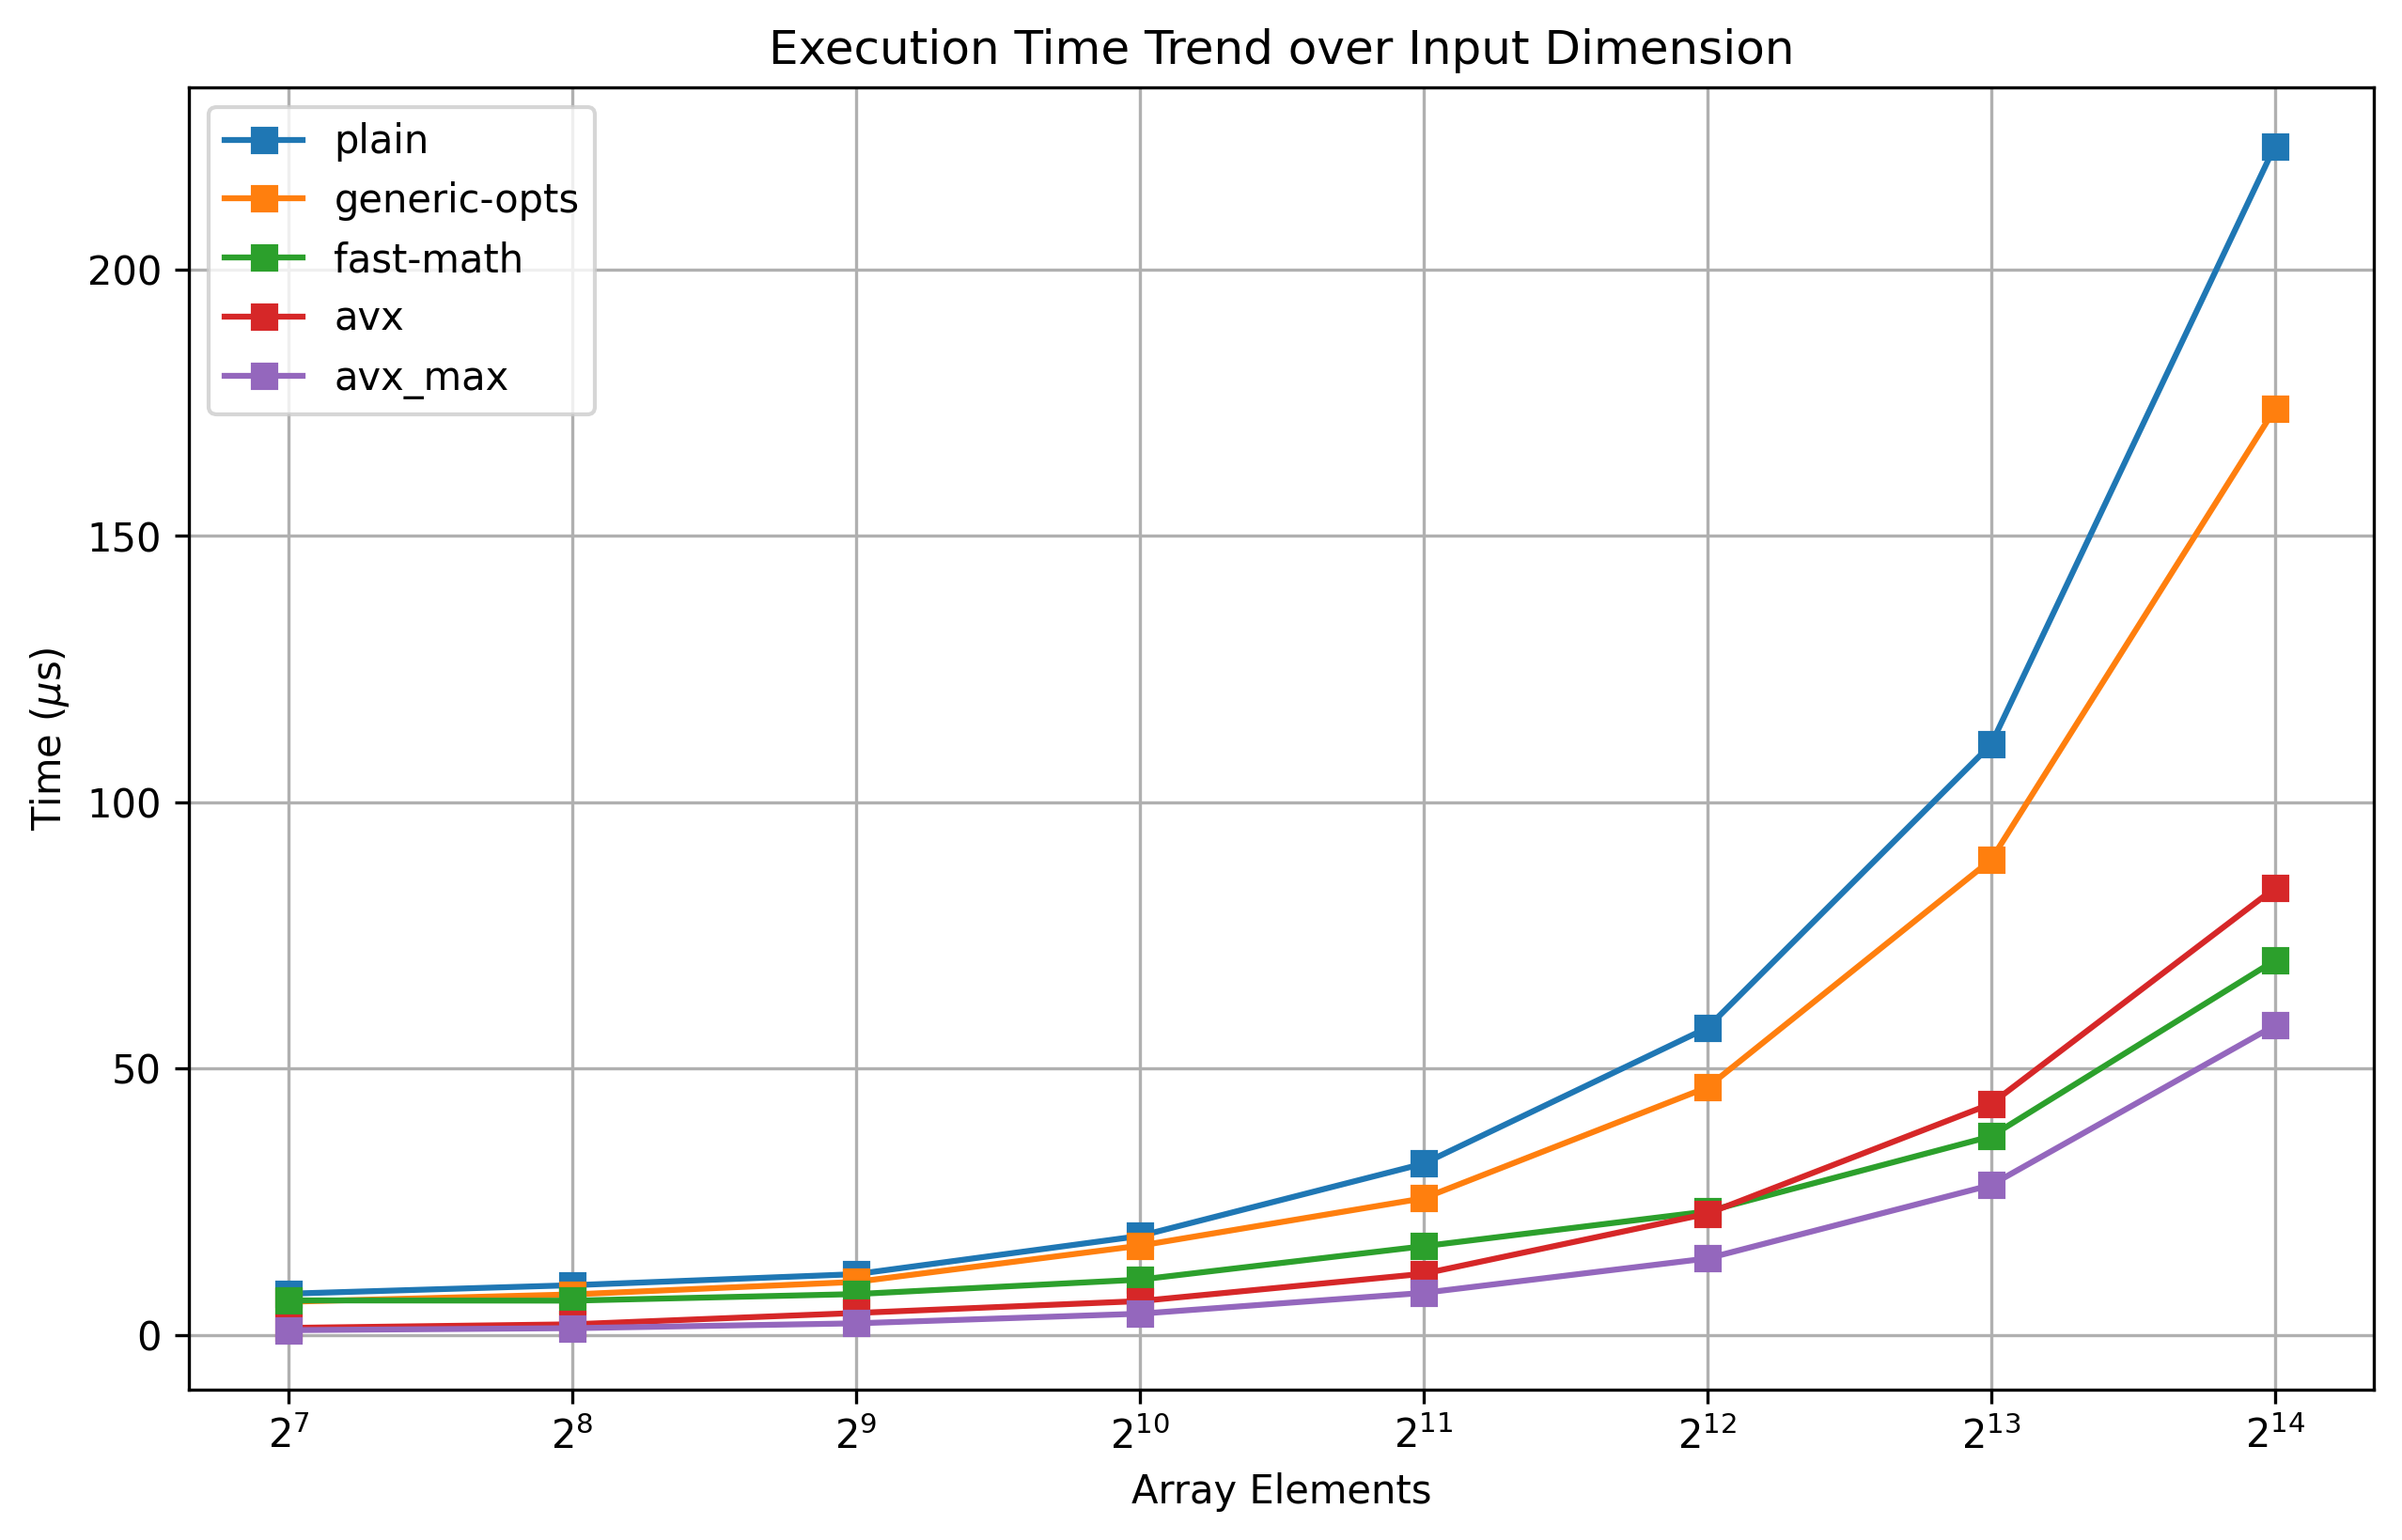

In [3]:
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 6), dpi=300)
plt.title("Execution Time Trend over Input Dimension")

labels = [c for c in df.columns if c != "elements"]
for label in labels:
    plt.plot(df["elements"], df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel(r"Time ($\mu$s)")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("time.svg")
plt.show()

In [4]:
speedup_df = df.copy()
for c in speedup_df.columns:
    if c != "elements":
        speedup_df[c] = df["plain"] / df[c]

speedup_df

,elements,plain,generic-opts,fast-math,avx,avx_max
0,128,1.0,1.244385,1.195307,6.008577,8.972637
1,256,1.0,1.228698,1.453024,4.757955,7.557548
2,512,1.0,1.146511,1.490236,2.786291,5.317566
3,1024,1.0,1.108667,1.791512,2.935019,4.699244
4,2048,1.0,1.253870,1.932951,2.805801,4.087499
5,4096,1.0,1.240588,2.488549,2.535637,4.023896
6,8192,1.0,1.243034,2.974878,2.556688,3.944197
7,16384,1.0,1.283938,3.175924,2.661024,3.843320


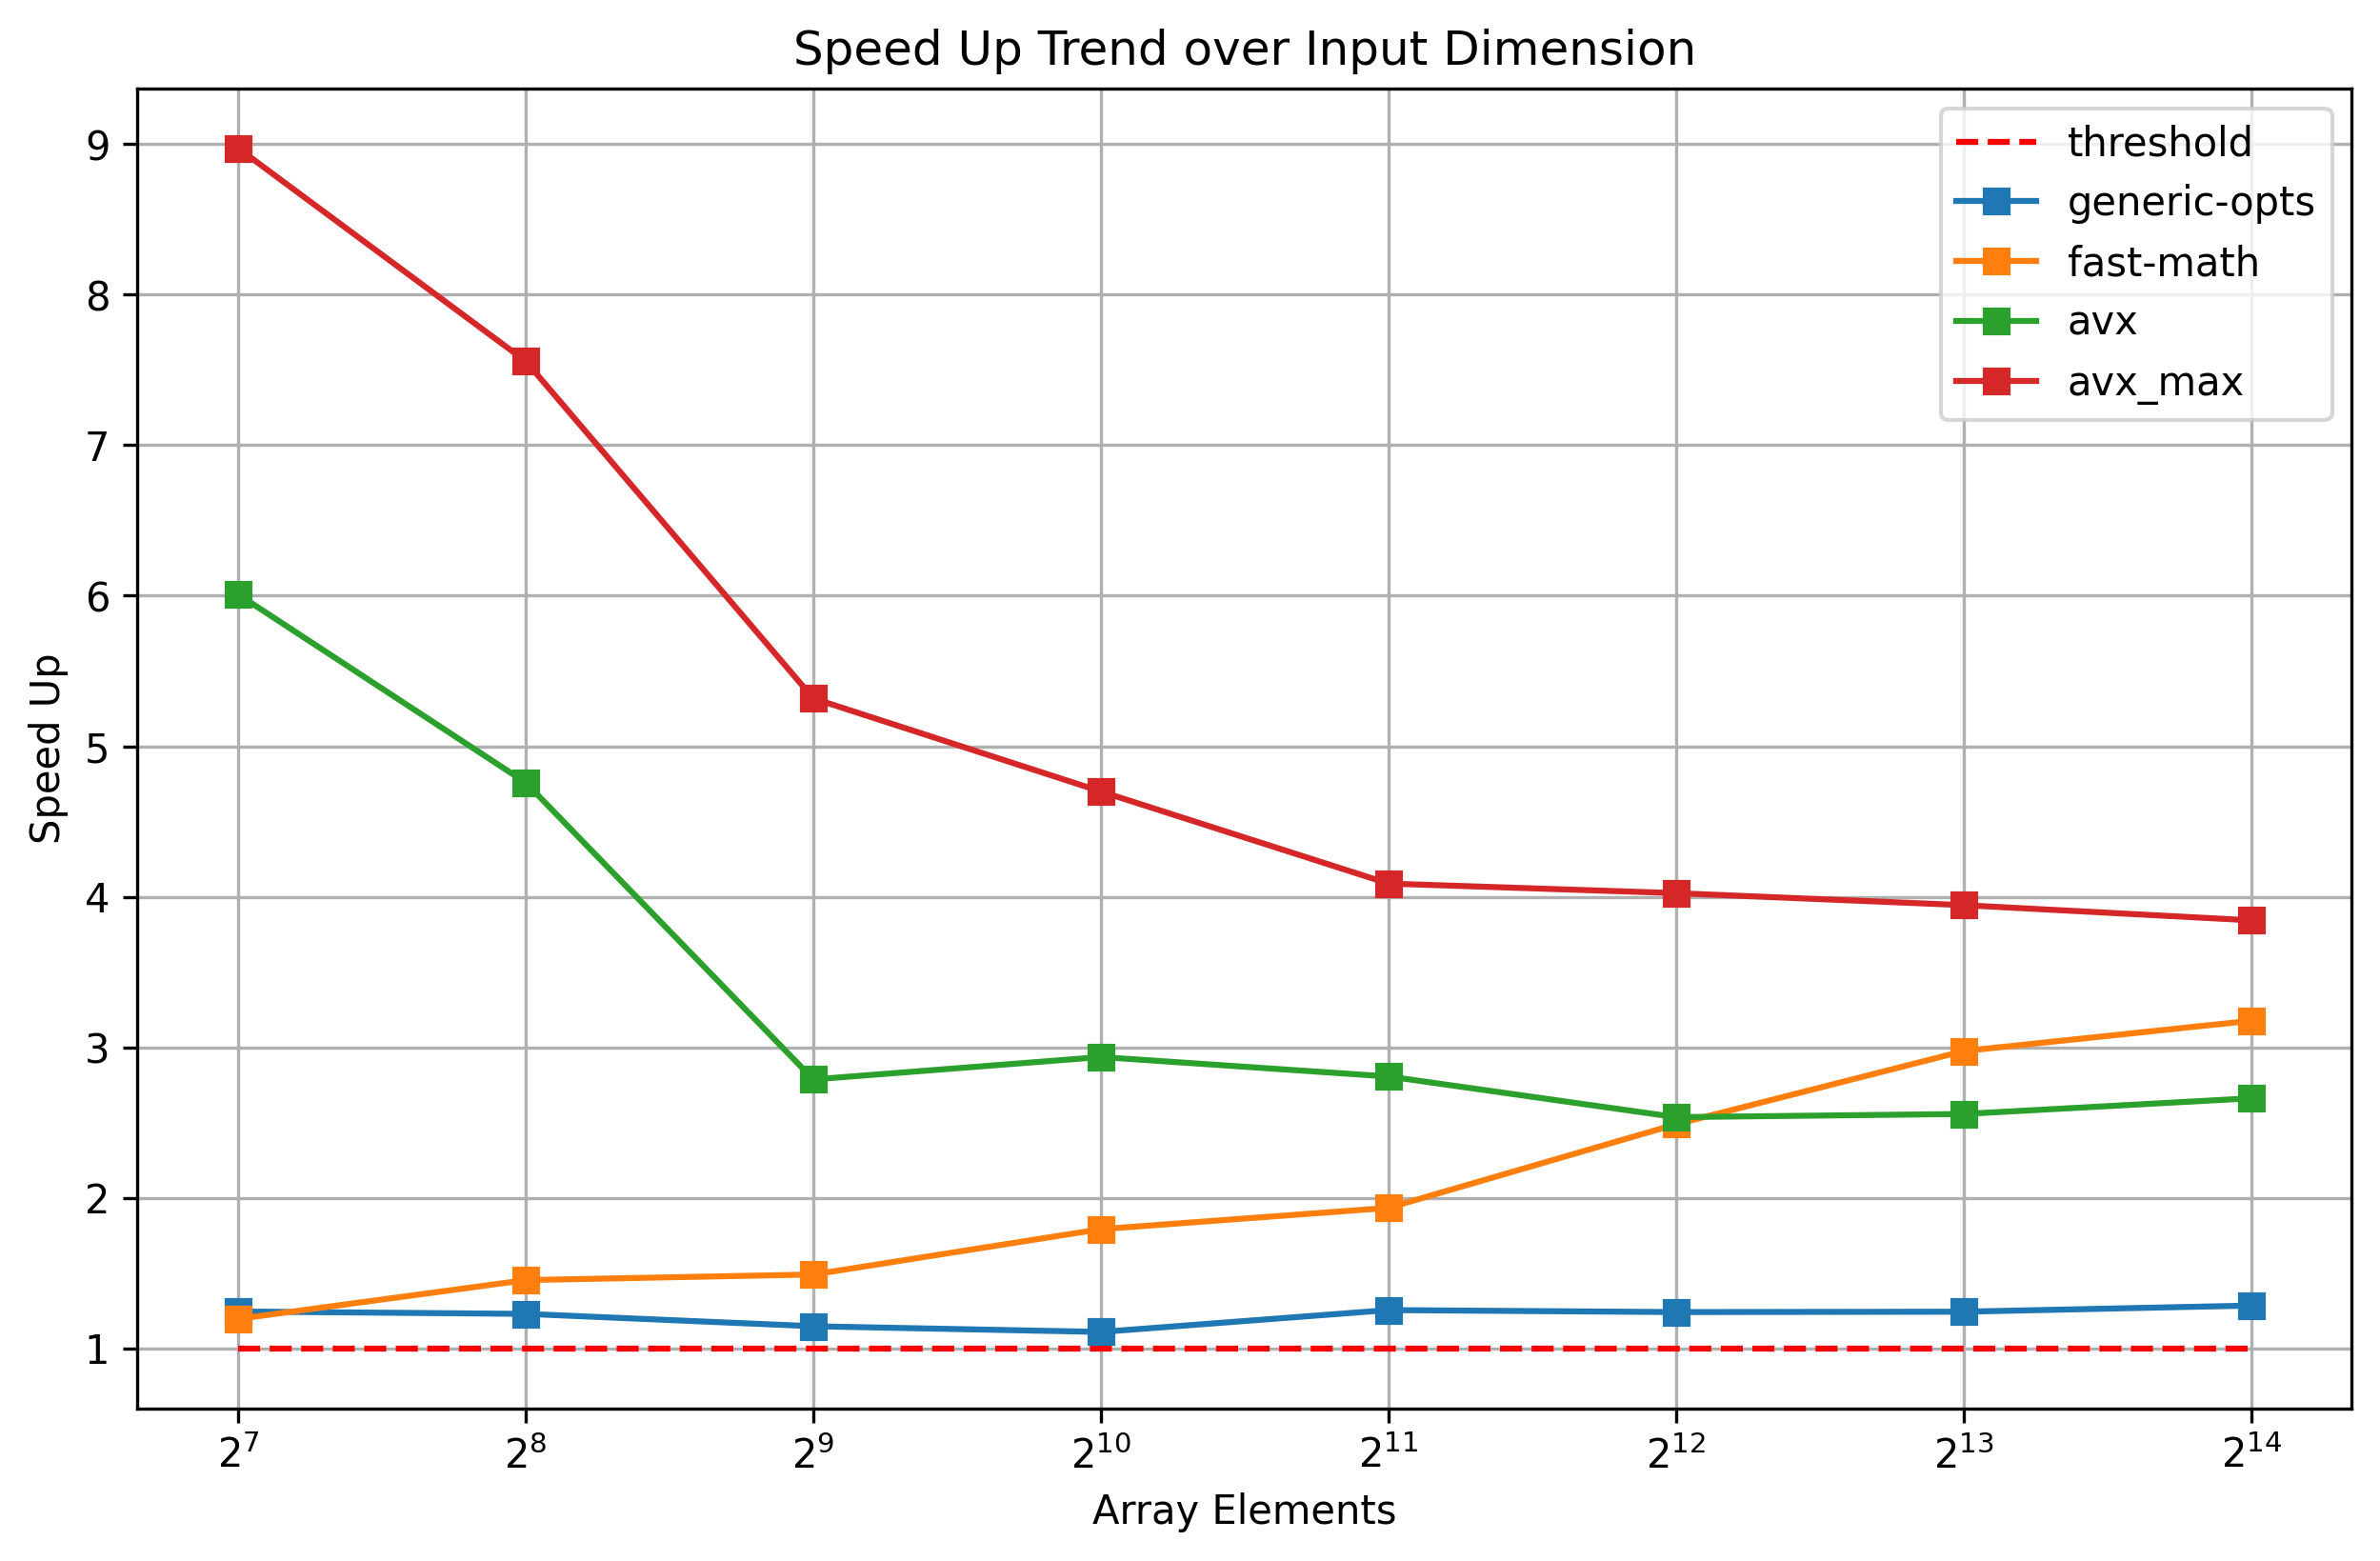

In [5]:
plt.figure(figsize=(10, 6), dpi=300)
plt.title("Speed Up Trend over Input Dimension")

# threshold of good speed up
plt.plot([128, 16384], [1.0, 1.0], "r--", label="threshold")

for label in labels:
    if label != "plain":
        plt.plot(speedup_df["elements"], speedup_df[label], marker="s", label=label)

plt.xlabel("Array Elements")
plt.ylabel("Speed Up")

plt.xscale("log", base=2)
plt.grid()
plt.legend()
plt.savefig("speed_up.svg")
plt.show()